## Kütüphanelerin Dahil Edilmesi

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats

## Veri Setlerin Okunması

In [3]:
median_house_hold_in_come = pd.read_csv('Datasets/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('Datasets/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('Datasets/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('Datasets/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('Datasets/PoliceKillingsUS.csv', encoding="windows-1252")

## Veri Setlerinin İncelenmesi

### Fakirlik Oranları İle İlgili Veri Seti

In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


* 29329 tane sample vardır.
* 3 feature üzerinden tanımlanmaktadır.
* Missing value yoktur.
* Tüm featurelar stringtir.
* Dosya boyutu 687.5 KB büyüklüğündedir.

<b>Fakirlik Dağılımını incelemek </b>

In [6]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10.9     128
        ... 
54.3       1
73.7       1
81.9       1
73.2       1
92.3       1
Name: poverty_rate, Length: 771, dtype: int64

* Fakirlik oranında yer alan "-" değeri anlamsız olduğundan bu feature değerine sahip sample birimlerindeki değerlere 0(sıfır) değeri vererek kurtulmak mümkündür.

In [7]:
percentage_people_below_poverty_level.poverty_rate.replace(["-"] ,0.0 , inplace = True)

* Veri seti bilgilerinde fakirlik oranını belirten sayısal özelliğin object gözükmesi anlamsızdır. Düzeltmek gerekir.

In [8]:
percentage_people_below_poverty_level.poverty_rate= percentage_people_below_poverty_level.poverty_rate.astype(float)

* Her bir eyaletin fakirlik oranını bulmak için tekil olarak eyaletler bulunmalıdır.

In [9]:
area_list = list(percentage_people_below_poverty_level["Geographic Area"].unique())

* Eyalet sayısı

In [10]:
len(area_list)

51

* Eyalet listesi

In [11]:
print(area_list)

['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


* Eyaletlere ait fakirlik oranları

In [12]:
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"]==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

* Görselleştirme için gerekli bu iki feature üzerinden dataframe oluşturulması yapılabilir.

In [13]:
data = pd.DataFrame({"area_list" : area_list , "area_poverty_ratio" : area_poverty_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending=False)).index.values
sorted_data_1 = data.reindex(new_index)

* Bu özellikleri kullanarak eyaletlerin fakirlik oranlarını görselleştirmek için barplot kullanılabilir.

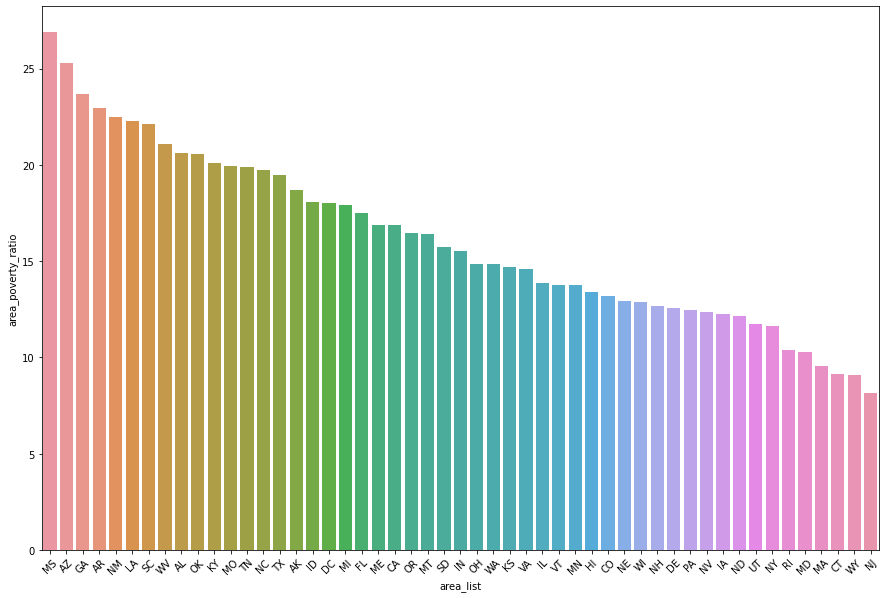

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data_1["area_list"] , y=sorted_data_1["area_poverty_ratio"])
plt.xticks(rotation = 45)
plt.show()

### Öldürülen Kişi Bilgileri Bulunan Veri Seti

In [15]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


* Veri setinde yer alan isimlerin dağılımları

In [16]:
kill.name.value_counts()

TK TK                   49
TK Tk                    2
Brandon Jones            2
Michael Johnson          2
Eric Harris              2
                        ..
Dana Hlavinka            1
Christopher Mitchell     1
Erica Lauro              1
Timmy Walling            1
Alejandro Salazar        1
Name: name, Length: 2481, dtype: int64

* Burada yer alan TK TK ve TK Tk girilen özellik değerleri gerçek isimleri yansıtmamaktadır. Görselleştirme yaparken dahil etmemek gerekir.

In [17]:
seperate = kill.name[(kill.name != "TK TK")].str.split()
a,b = zip(*seperate)
name_list = a+b
name_count = Counter(name_list)

most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x) , list(y)

<b>Öldürülen İnsanların İsim veya Soyisimlerinden En Sık Olan 15 Tanesi</b>

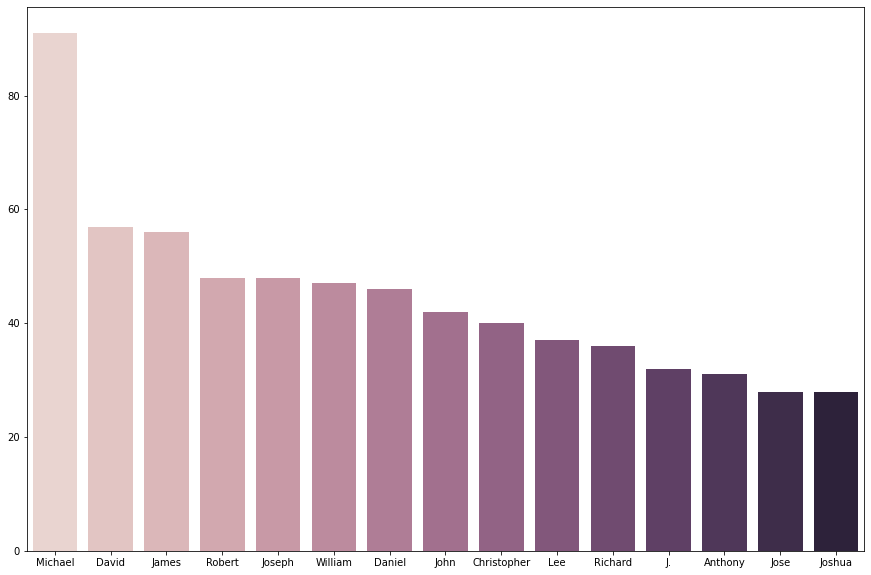

In [18]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=x, y=y , palette = sns.cubehelix_palette(len(x)));

### Lise Mezuniyet Oran Bilgilerini İçeren Veri Seti

In [19]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


* Uygun formatta olmayan veya eksik veri kontrolü

In [20]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
42         1
22.5       1
43.8       1
38.8       1
42.7       1
Name: percent_completed_hs, Length: 728, dtype: int64

* "-" değerine sahip gözlemler var. İstenilen değer değil 0 değeri ile değiştirilebilir.

In [21]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(["-"],0.0, inplace=True)

In [22]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


* Eksik veri mevcut değil.
* Sayısal bir özelliğin değerleri object verildiğinden bunu düzeltmek gerekir.

In [23]:
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

* Eyaletlerin isimlerini görselleştirmede kullanmak için alınmalıdır.

In [24]:
area_list = list(percent_over_25_completed_highSchool["Geographic Area"].unique())

* Tekil olacak şekilde oluşturulan eyalet listesinden faydalanarak 25 yaş üstünde olan lise mezun oranını bulunabilir.

In [25]:
area_highschool = []
for i in area_list :
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool["Geographic Area"] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

* Sıralama yapmak grafikte karmaşıklığı önleyebilir.

In [26]:
data = pd.DataFrame({"area_list" : area_list , "area_highschool_ratio" : area_highschool})
new_index = (data["area_highschool_ratio"].sort_values(ascending=True)).index.values
sorted_data_2 = data.reindex(new_index)

* İstenen veri analizini barplot ile gösterilebilir.

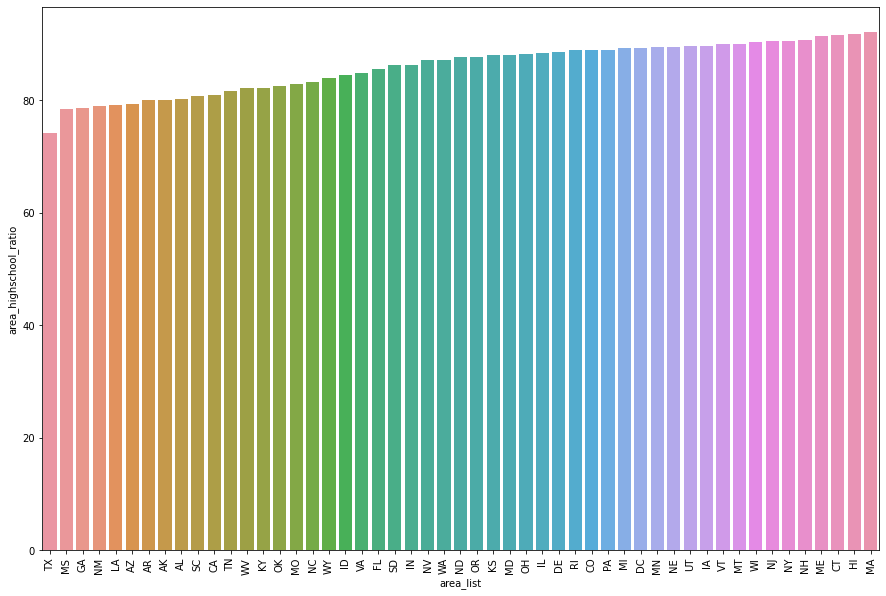

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data_2["area_list"] , y=sorted_data_2["area_highschool_ratio"])
plt.xticks(rotation = 90)
plt.xlabel = "Eyaletler"
plt.ylabel = "Lise Mezuniyet Oranı"
plt.title = "Eyaletlerdeki Yetişkinlerdeki Lise Mezuniyet Oranı"
plt.show()

### Eyaletlere Ait Irk Dağılımlarının Veri Seti

In [28]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [29]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [30]:
share_race_city.replace(["-"] , 0.0 , inplace=True)
share_race_city.replace(["(X)"], 0.0, inplace=True)
share_race_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]] = share_race_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)

In [31]:
area_list = list(share_race_city["Geographic area"].unique())
share_white = []
share_black = []
share_native_american =[]
share_asian = []
share_hispanic = []

for i in area_list:
    x = share_race_city[share_race_city["Geographic area"] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

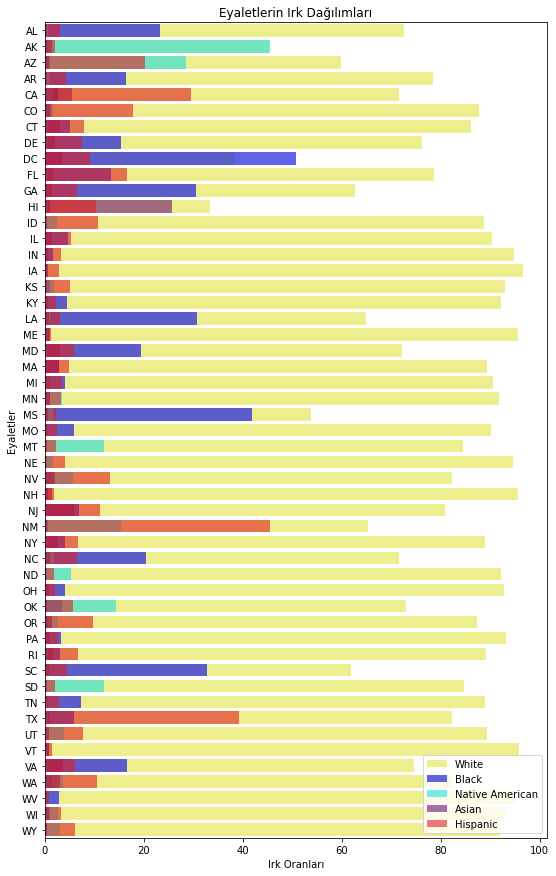

In [32]:
f,ax = plt.subplots(figsize=(9,15))
sns.barplot(x=share_white, y=area_list , color="yellow" , alpha=0.5 , label="White")
sns.barplot(x=share_black, y=area_list , color="blue" , alpha=0.7 , label="Black")
sns.barplot(x=share_native_american, y=area_list , color="cyan" , alpha=0.6, label="Native American")
sns.barplot(x=share_asian, y=area_list , color="purple" , alpha=0.6 , label="Asian")
sns.barplot(x=share_hispanic, y=area_list , color="red" , alpha=0.6, label="Hispanic")

ax.legend(loc="lower right" , frameon=True)
ax.set(xlabel = "Irk Oranları" , ylabel = "Eyaletler" , title = "Eyaletlerin Irk Dağılımları");

<b>Her Eyalet İçin Fakirlik Oranı ve Lise Mezuniyet Oranını Karşılaştırılması</b>

In [33]:
sorted_data_1.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [34]:
sorted_data_2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


In [35]:
sorted_data_1["area_poverty_ratio"] = sorted_data_1["area_poverty_ratio"]/max(sorted_data_1["area_poverty_ratio"])
sorted_data_2["area_highschool_ratio"] = sorted_data_2["area_highschool_ratio"]/max(sorted_data_2["area_highschool_ratio"])
data = pd.concat([sorted_data_1,sorted_data_2["area_highschool_ratio"]] , axis=1)
data.sort_values("area_poverty_ratio", inplace=True)

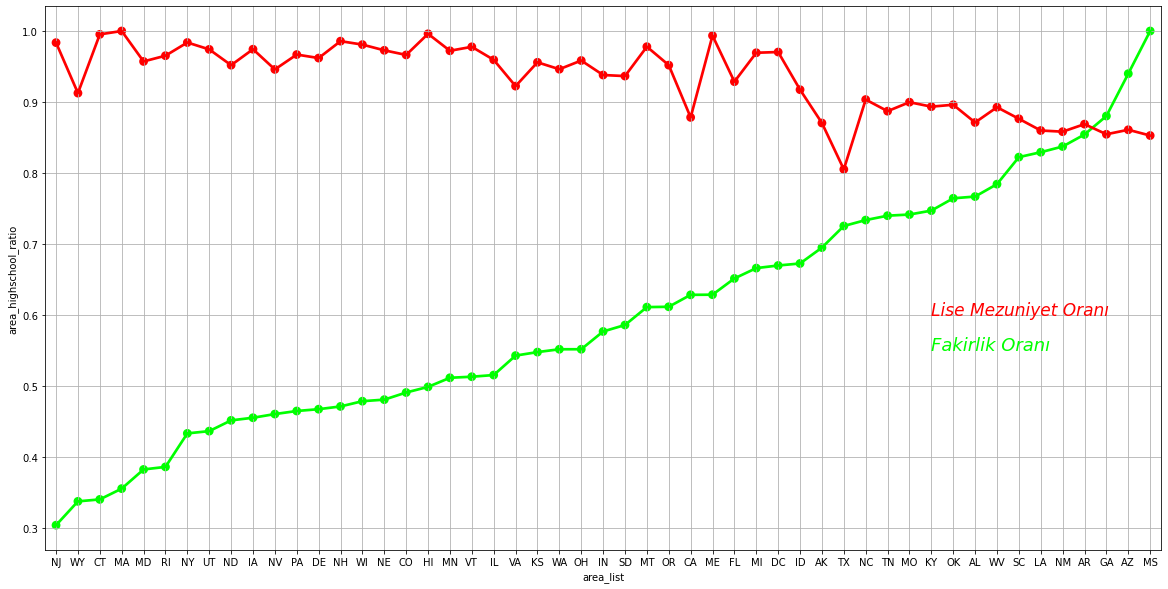

In [36]:
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x = "area_list" , y = "area_poverty_ratio" , data=data , color="lime" , alpha=0.8)
sns.pointplot(x = "area_list" , y = "area_highschool_ratio" , data=data , color = "red", alpha=0.8)
plt.text(40,0.6, "Lise Mezuniyet Oranı" , color="red" , fontsize=17 , style = "italic")
plt.text(40,0.55, "Fakirlik Oranı" , color="lime" , fontsize=18, style = "italic")
plt.grid()

<b>Ölen Kişilerin Irklarının Oranı</b>

In [43]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [44]:
kill.dropna(inplace=True)
labels =kill.race.value_counts().index
colors = ["orange","cyan","red","yellow","green","brown"]
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

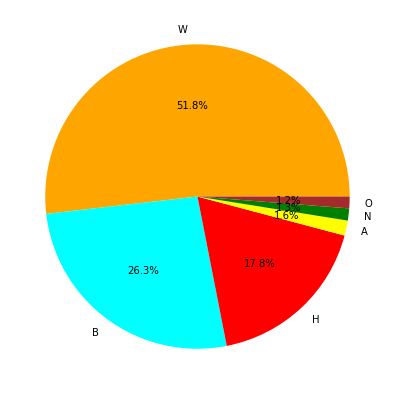

In [45]:
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%");

<b>Fakirlik Oranı İle Liseden Mezun Olma Oranı</b>

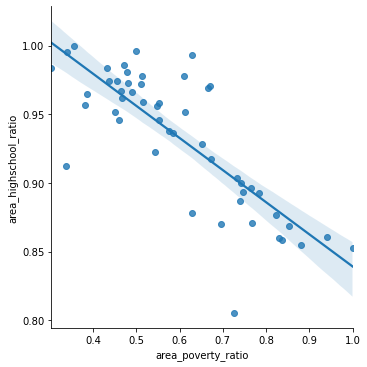

In [46]:
sns.lmplot(x="area_poverty_ratio" , y = "area_highschool_ratio" , data=data)
plt.show()

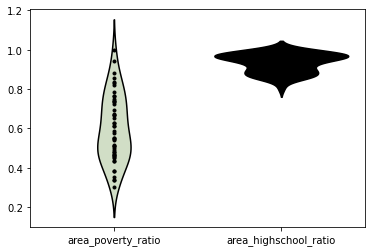

In [48]:
pal = sns.cubehelix_palette(2,rot=-.5, dark=-.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

<b>Korelasyon Haritası</b>

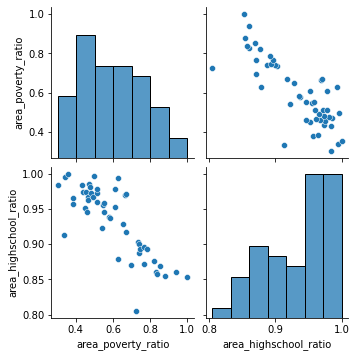

In [49]:
sns.pairplot(data)
plt.show()

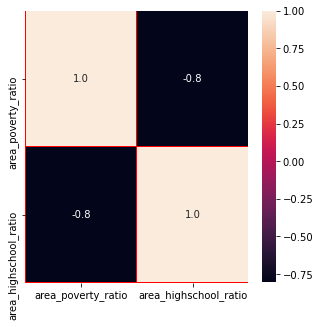

In [50]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr() , annot=True , linewidth=.5 ,linecolor = "red", fmt=".1f" , ax=ax)
plt.show()

<b>Ölüm Şekilleri ve Cinsiyetlerine Göre Ölen Kişilerin Yaş Dağılımları</b>

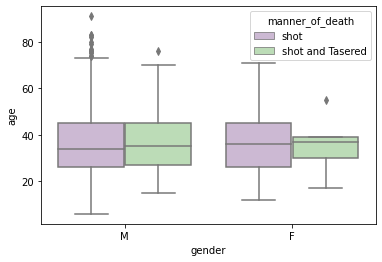

In [51]:
sns.boxplot(x="gender" , y="age" , hue="manner_of_death" , data=kill , palette = "PRGn")
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


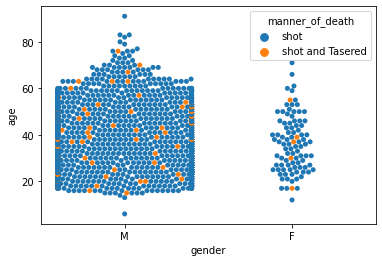

In [56]:
sns.swarmplot(x="gender" , y="age" , hue="manner_of_death" , data=kill)
plt.show()

<b>Ölüme Sebep Olan Silahların Kullanım Frekansları</b>

In [54]:
kill.manner_of_death.value_counts()

shot                2100
shot and Tasered     154
Name: manner_of_death, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


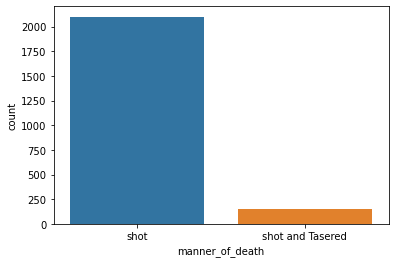

In [55]:
sns.countplot(kill.manner_of_death)
plt.show()

<b>Öldürülen Kişilerin Kullandığı Silahlar</b>

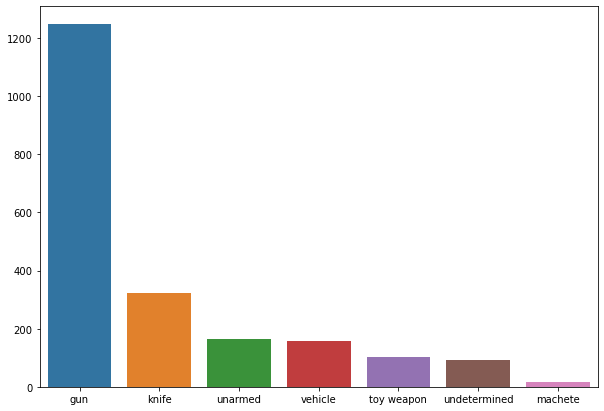

In [57]:
armed = kill.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index, y=armed[:7].values)
plt.show()

<b>En Tehlikeli Şehirler</b>

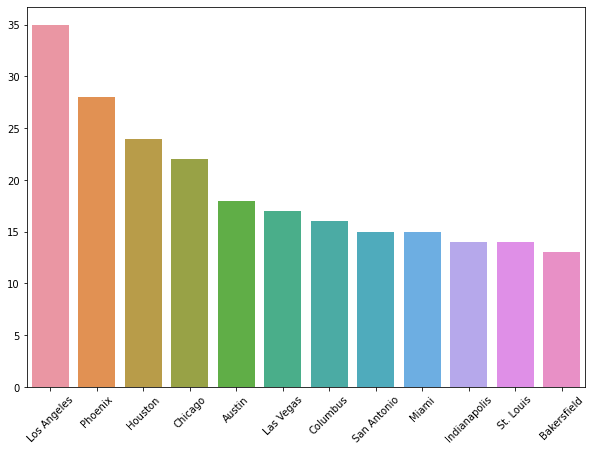

In [59]:
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index , y=city[:12].values)
plt.xticks(rotation=45)
plt.show()